### Depth Limited First Search

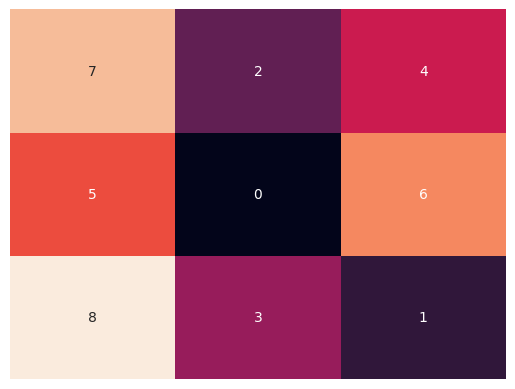

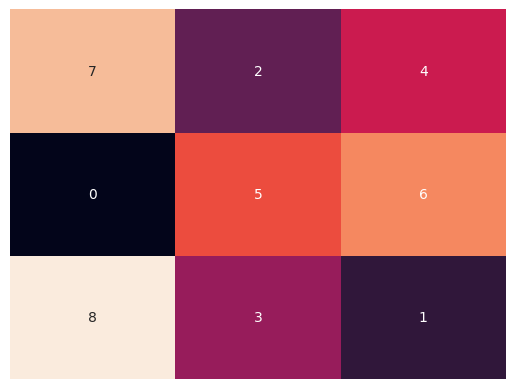

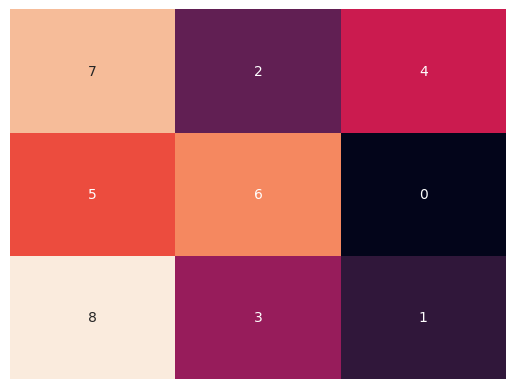

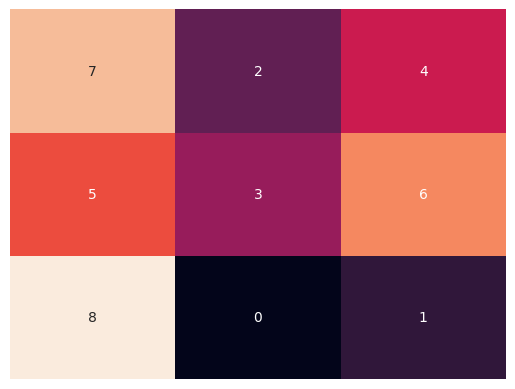

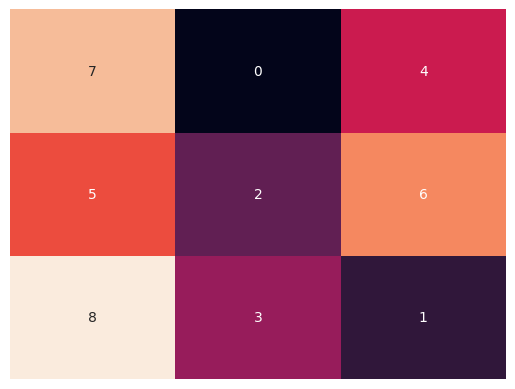

Goal not found within the depth limit.


In [1]:
from collections import deque
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def find_blank_square(state):
    return state.index(0)

def actions(state, dimension):
    possible_actions = ['UP', 'DOWN', 'RIGHT', 'LEFT']
    index_blank_square = find_blank_square(state)

    row, col = divmod(index_blank_square, dimension)

    if col == 0:
        possible_actions.remove('LEFT')
    if row == 0:
        possible_actions.remove('UP')
    if col == dimension - 1:
        possible_actions.remove('RIGHT')
    if row == dimension - 1:
        possible_actions.remove('DOWN')

    return possible_actions

def result(state, action, dimension):
    blank = find_blank_square(state)
    new_state = list(state)
    move = {'UP': -dimension, 'DOWN': dimension, 'LEFT': -1, 'RIGHT': 1}
    neighbor = blank + move[action]
    new_state[blank], new_state[neighbor] = new_state[neighbor], new_state[blank]
    return tuple(new_state)

def goal_test(state, goal):
    return state == goal

def view_state(state, dimension):
    state = np.reshape(state, (dimension, dimension))
    ax = sns.heatmap(state, annot=True, fmt="d", cbar=None, xticklabels=False, yticklabels=False)
    plt.show()

def depth_limited_search(initial_state, goal, dimension, depth_limit, current_depth=0, debug=False):
    # remove pass and, write your code
    stack = [(initial_state, 0)]
    # print(stack)
    visited = set()
    
    while stack:
        node, current_depth = stack.pop()
        if debug:
            view_state(node, dimension)
        if goal_test(node, goal):
            print("Goal Reached")
            return node
        if current_depth < depth_limit:
            for action in actions(node, dimension):
                next_state = result(node,action, dimension)
                if (next_state not in visited) and (next_state not in stack):
                    visited.add(next_state)
                    stack.append([next_state, current_depth+1])


# Example usage
# initial_state = (1,0,2,3,4,5,6,7,8)
initial_state = (7,2,4,5,0,6,8,3,1)
goal_state = (0,1,2,3,4,5,6,7,8)
dimension = int(len(initial_state) ** 0.5)
depth_limit = 1  # Set your desired depth limit

result_node = depth_limited_search(initial_state, goal_state, dimension, depth_limit, debug=True)

if result_node:
    print("Goal found!")
else:
    print("Goal not found within the depth limit.")


In [11]:
result_node = depth_limited_search(initial_state, goal_state, dimension, depth_limit=37, debug=False)
if result_node:
    print("Goal found!")
else:
    print("Goal not found within the depth limit.")

Goal Reached
Goal found!


### Conclusion

##### The goal reached at depth limit 37.